6 colours 4 holes
but better to leave that flexible. so C and H
same for number of tries T, usually 11 i think

goal of this is to be able to test 2 different strategies and compare them again really big datasets.
1st strategy is fully random
2nd strategy is all one colour then all second colour etc.

here we do the thing wher eyou know how many are well placed but not which ones.

quick maths: 2nd strategy definitely wins. but good to compare! and with different T and C and H etc

In [2]:
c = ['a','b','c','d','e','f','g']
n = 4
t = 11
code = ['a','a','b','b']

In [9]:
def compare(attempt,code,n):
    #0 is wrong, 1 is right but not well placed, 2 is well placed
    result = [0]*n
    result_bool = [True]*n
    for i in range(n):
        if attempt[i] == code[i]:
            result[i] = 2
            result_bool[i] = False
    new_attempt = [b for a, b in zip(result_bool, attempt) if a]
    new_code = [b for a, b in zip(result_bool, code) if a]
    result.sort()
    for i in range(len(new_attempt)):
        if new_attempt[i] in new_code:
            result[i] = 1
            new_code.remove(new_attempt[i])
    result.sort()
    return result

In [13]:
#2nd strategy
import random

def one_second_strategy_game(code,n,c):
    '''counter is going to end up being [2,2,0,0,0,0,0] if code is ['a','a','b','b']
    random placement but number of tiles of a spceific colour picked'''
    
    attempt = [c[0]]*n
    counter_1 = [0]*len(c)
    attempts = []
    results = []
    k = 1
    
    for i in range(len(c)-1):
        if attempt == code:
            return k
        current_result =  compare(attempt,code,n)
        attempts.append(attempt)
        results.append(current_result)
        counter_1[i] = sum([1 for i in current_result if i != 0]) - sum(counter_1)
        attempt = []
        for j in range(len(c)):
            attempt.extend([c[j]]*counter_1[j])
        attempt.extend([c[i+1]]*(n-sum(counter_1)))
        things_to_check = [False]*len(results)
        while things_to_check != [True]*len(results):
            random.shuffle(attempt)
            for j in range(len(attempts)):
                things_to_check[j] = (compare(attempt,attempts[j],n) == results[j])
                if things_to_check[j] == False:
                    break
        k+=1
    #[f,g,g,f]
    attempt2 = attempt.copy()
    attempts.append(attempt2)
    results.append(compare(attempt2,code,n))
    while attempt != code:
        random.shuffle(attempt)
        if [compare(i,attempt,n) for i in attempts] == results:
            attempts.append(attempt)
            results.append(compare(attempt,code,n))
            k+=1
    return k
sum_4 = 0
for x in range(100):
    code = random.choices(c*4, k=4)
    sum_4 += one_second_strategy_game(code)
print(sum_4/100)

TypeError: one_second_strategy_game() missing 2 required positional arguments: 'n' and 'c'

In [11]:
#1st strategy:
#maybe another function that says if an attempt is valid according to another attempt/code result
#no need, compare alreayd does that! obviously

import random 

def one_first_strategy_game(code,n,c):
    i = 0
    attempt = random.choices(c, k=n)
    attempts = []
    results = []
    while attempt != code:
        attempts.append(attempt)
        results.append(compare(attempt,code,n))
    
        things_to_check = [False]*len(results)
        while things_to_check != [True]*len(results):
            attempt = random.choices(c, k=n)
            for j in range(len(attempts)):
                things_to_check[j] = (compare(attempt,attempts[j],n) == results[j])
                if things_to_check[j] == False:
                    break
        i+=1
    return i

#average is 3.98452 over 100000 tries
#no way strategy 2 beats this LOL 
#need to try different number of colours and different n to be sure.

In [16]:
colours = ['a','b','c','d','e','f','g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']
list_strat_one = []
list_strat_two = []
for n in range(3,11):
    for f in range(n,11):
        c = colours[0:f]
        sum_1 = 0
        sum_2 = 0
        print(n,f)
        for l in range(10):
            code = random.choices(c*n,k=n)
            sum_1 += one_first_strategy_game(code,n,c)
            sum_2 += one_second_strategy_game(code,n,c)
        list_strat_one.append([n,f,sum_1/10])
        list_strat_two.append([n,f,sum_2/10])

3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
4 4
4 5
4 6
4 7
4 8
4 9
4 10
5 5
5 6
5 7
5 8
5 9
5 10
6 6
6 7
6 8
6 9
6 10
7 7
7 8
7 9
7 10
8 8
8 9


KeyboardInterrupt: 

In [17]:
print(list_strat_one)

[[3, 3, 1.5], [3, 4, 2.4], [3, 5, 2.5], [3, 6, 3.4], [3, 7, 3.5], [3, 8, 4.2], [3, 9, 4.6], [3, 10, 5.2], [4, 4, 2.7], [4, 5, 3.5], [4, 6, 3.7], [4, 7, 3.7], [4, 8, 4.7], [4, 9, 4.8], [4, 10, 5.1], [5, 5, 3.9], [5, 6, 3.9], [5, 7, 4.8], [5, 8, 4.7], [5, 9, 5.1], [5, 10, 5.3], [6, 6, 4.6], [6, 7, 4.5], [6, 8, 5.7], [6, 9, 5.6], [6, 10, 6.2], [7, 7, 5.6], [7, 8, 5.8], [7, 9, 6.1], [7, 10, 7.1], [8, 8, 6.2]]


In [18]:
print(list_strat_two)

[[3, 3, 3.3], [3, 4, 3.7], [3, 5, 4.7], [3, 6, 5.6], [3, 7, 6.3], [3, 8, 5.7], [3, 9, 7.5], [3, 10, 7.9], [4, 4, 4.0], [4, 5, 5.0], [4, 6, 5.9], [4, 7, 6.8], [4, 8, 7.3], [4, 9, 8.2], [4, 10, 8.4], [5, 5, 5.4], [5, 6, 6.7], [5, 7, 7.0], [5, 8, 7.8], [5, 9, 8.8], [5, 10, 9.3], [6, 6, 6.4], [6, 7, 6.9], [6, 8, 7.7], [6, 9, 8.8], [6, 10, 8.7], [7, 7, 7.7], [7, 8, 8.7], [7, 9, 9.0], [7, 10, 9.7], [8, 8, 8.2]]


In [ ]:
one_first_strategy_game(['a'])

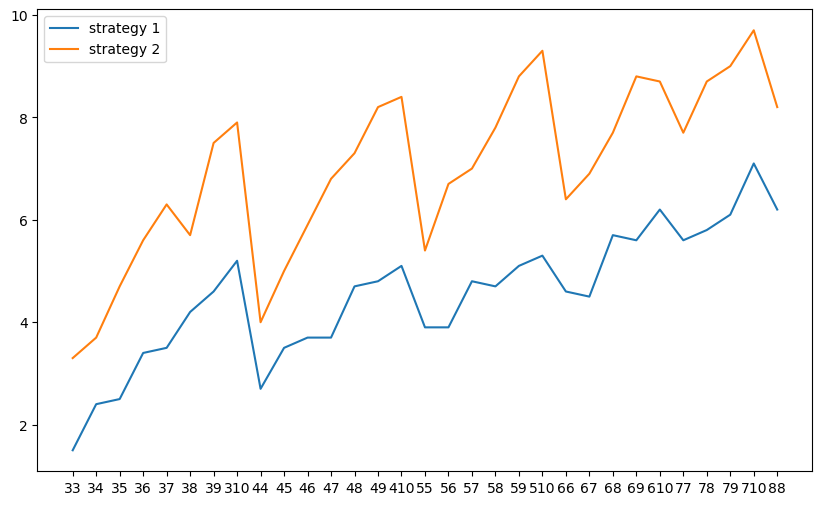

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot([str(item[0])+str(item[1]) for item in list_strat_one],[item[2] for item in list_strat_one], label = "strategy 1")
plt.plot([str(item[0])+str(item[1]) for item in list_strat_two],[item[2] for item in list_strat_two], label = "strategy 2")
plt.legend()
plt.show()

In [ ]:
#my custom strategy is stupid :(
#could investigate with a maximum number of tries if my strategy is less likely to go above that number?